In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Datrain = '/content/drive/MyDrive/TA/Dataset/Model 1/Train'
Davalid = '/content/drive/MyDrive/TA/Dataset/Model 1/Val'
Datest = '/content/drive/MyDrive/TA/Dataset/Model 1/Test'
Labelling = pd.read_csv(
    "/content/drive/MyDrive/TA/Dataset/Labels.txt",names = [
                                  "Label",
                                  "Nama",
                                  "GambarTrain"
                                  "GambarValid"
    ],
    skiprows = 1,
    index_col = False
)

label = Labelling["Nama"].str.strip()
label = label.to_numpy()
print(label)

['Badak' 'Beruang' 'Gajah' 'Harimau' 'NonDeteksi' 'Orangutan']


In [ ]:
IMAGE_SIZE = [256, 256]
EPOCHS = 10
SEED = 1337
CLASSES = 6
BATCH_SIZE = 32 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 30,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    Datrain,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'categorical'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

validation_generator = test_datagen.flow_from_directory(
    Davalid,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    seed = SEED,
    shuffle = False,
    class_mode = 'categorical'
)


test_generator = test_datagen.flow_from_directory(
    Datest,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    seed = SEED,
    shuffle = False,
    class_mode = 'categorical'
)

Found 18637 images belonging to 6 classes.
Found 2071 images belonging to 6 classes.
Found 5180 images belonging to 6 classes.


In [ ]:
resnet_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False
)

x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
predictions = tf.keras.layers.Dense(
    int(len(train_generator.class_indices.keys())),
    activation='softmax'
)(x)

resnet50_model = tf.keras.models.Model(
    inputs= resnet_model.input, 
    outputs=predictions
)

resnet50_model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
    metrics=['accuracy']
)

history = resnet50_model.fit_generator(
    train_generator, 
    epochs=EPOCHS, 
    shuffle=True, 
    verbose=1,
    validation_data=validation_generator
)

resnet50_model.save('/content/drive/MyDrive/TA/Model/Models/Models.h5')

94781440/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
583/583 [==============================] - 5436s 9s/step - loss: 0.5801 - accuracy: 0.8345 - val_loss: 1.5928 - val_accuracy: 0.3679
Epoch 2/10
583/583 [==============================] - 530s 908ms/step - loss: 0.1421 - accuracy: 0.9661 - val_loss: 0.0639 - val_accuracy: 0.9884
Epoch 3/10
583/583 [==============================] - 524s 898ms/step - loss: 0.0845 - accuracy: 0.9791 - val_loss: 0.0394 - val_accuracy: 0.9913
Epoch 4/10
583/583 [==============================] - 535s 917ms/step - loss: 0.0627 - accuracy: 0.9843 - val_loss: 0.0287 - val_accuracy: 0.9928
Epoch 5/10
583/583 [==============================] - 546s 936ms/step - loss: 0.0502 - accuracy: 0.9868 - val_loss: 0.0240 - val_accuracy: 0.9928
Epoch 6/10
583/583 [==============================] - 539s 924ms/step - loss: 0.0425 - accuracy: 0.9889 - val_loss: 0.0197 - val_accuracy: 0.9947
Epoch 7/10
583/583 [==============================] - 533s 913ms/step - loss: 0.0360 - accuracy: 0.9903 - val_loss: 0.0175 - v

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


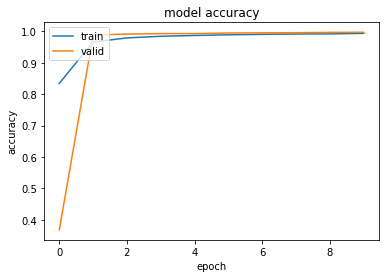

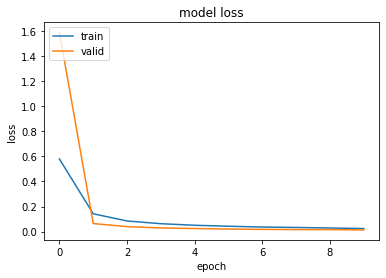

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()